In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from time import time
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import itertools
from sklearn.manifold import TSNE

from context import predicate_search
from predicate_search import PredicateInduction, RobustNormal, Density, BottomUp, Predicate

In [2]:
data = pd.read_csv('../data/satellite_s1.csv')

In [3]:
data.columns = [f'f{col}' for col in data.columns]

In [4]:
refit = True

In [5]:
if refit:
    predicate_induction = PredicateInduction(data, [])
    with open('satellite_s1_pixal.pkl', 'wb') as f:
        pickle.dump(predicate_induction, f)
else:
    with open('satellite_s1_pixal.pkl', 'rb') as f:
        predicate_induction = pickle.load(f)

In [6]:
all_features = ','.join(data.columns)

In [7]:
distances = {all_features: predicate_induction.model.distance(predicate_induction.norm_data)}

In [8]:
k=3

In [9]:
for n in range(1, k+1):
    for group in itertools.combinations(data.columns, n):
        features = list(group)
        dist = predicate_induction.model.distance(predicate_induction.norm_data[features])
        distances[','.join(features)] = dist

In [10]:
distances = pd.DataFrame(distances)

In [11]:
distances

,"f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35",f0,f1,f2,f3,f4,f5,f6,f7,f8,...,"f31,f32,f33","f31,f32,f34","f31,f32,f35","f31,f33,f34","f31,f33,f35","f31,f34,f35","f32,f33,f34","f32,f33,f35","f32,f34,f35","f33,f34,f35"
0,9.345159,0.000000,1.377890,1.892522,2.384458,0.551274,0.855924,1.292022,1.631579,1.108438,...,2.846252,2.603296,3.091522,2.532554,2.653511,2.817970,2.486009,1.998238,2.740093,2.445189
1,8.504955,0.548979,0.918593,1.362616,1.625767,1.102547,0.395042,0.684012,0.761403,1.662656,...,1.360140,2.076245,1.338387,2.308236,1.371110,2.499820,2.046437,1.371067,2.336258,2.445189
2,7.611616,1.646937,0.065614,0.454205,0.433538,1.653821,0.395042,0.000000,0.435088,1.108438,...,1.458421,1.418030,1.292049,2.031974,1.604994,1.058768,2.046437,1.643136,1.418514,2.055938
3,9.941841,0.411734,1.246663,1.665420,2.709612,0.000000,0.855924,1.596028,1.849122,0.554219,...,2.494699,2.335824,2.343364,2.155716,1.993643,1.223167,2.264203,2.141532,2.138834,1.848823
4,8.472230,0.548979,0.065614,0.757009,1.083845,1.516003,0.329201,0.304005,0.000000,1.524102,...,2.944313,2.931036,2.939310,1.471650,1.704686,1.713582,2.887043,2.891711,2.627947,1.457870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,45.567098,2.744896,4.527353,0.227103,4.226994,2.342913,4.279618,0.152003,3.480701,1.524102,...,5.765099,6.205714,6.332700,4.595308,4.257833,1.980297,6.079153,6.308063,6.307902,4.788083
2215,47.844284,0.137245,0.262455,0.681308,0.758691,0.413455,0.526722,0.608011,0.761403,1.385547,...,23.566250,11.909879,13.427915,26.482695,35.627927,13.189438,19.647435,33.356334,17.227459,33.836470
2216,58.181761,1.372448,1.377890,0.681308,0.325153,1.378184,1.580167,0.608011,0.435088,1.801211,...,24.513353,14.629712,13.284394,25.918307,33.379458,14.293341,16.275605,29.868503,16.573376,30.084413
2217,60.422522,1.097958,1.246663,1.135513,1.734152,0.689092,1.909368,0.760013,0.217544,0.969883,...,25.449609,14.372037,14.032285,27.518129,35.865649,14.271947,18.561948,32.649287,17.565911,33.007841


In [12]:
threshold = 30

In [13]:
targets_str = distances[distances > threshold].count().argmax()

/Users/bmontambault/anaconda3/envs/forecasting/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':


In [14]:
above_threshold = distances[targets_str][distances[targets_str] > threshold]

In [15]:
targets = targets_str.split(',')

In [16]:
targets

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35']

In [17]:
tsne = TSNE(n_components=2)
projection = pd.DataFrame(tsne.fit_transform(data))

In [18]:
def brush(x1, x2, y1, y2):
    fig, ax = plt.subplots()
    projection.plot.scatter(x=0, y=1, ax=ax)
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, facecolor='none', linestyle='--')
    ax.add_patch(rect)
    
    index = list(projection[(projection[0] >= x1) & (projection[0] <= x2) &
                (projection[1] >= y1) & (projection[1] <= y2)].index)
    return index

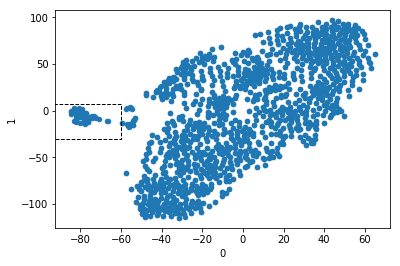

In [26]:
index = brush(-95, -60, -30, 7)

In [27]:
len(index)

67

In [28]:
index

[2144,
 2145,
 2146,
 2147,
 2148,
 2149,
 2150,
 2152,
 2153,
 2156,
 2157,
 2158,
 2160,
 2162,
 2163,
 2164,
 2165,
 2166,
 2167,
 2168,
 2169,
 2170,
 2171,
 2172,
 2173,
 2174,
 2175,
 2176,
 2177,
 2178,
 2179,
 2180,
 2181,
 2182,
 2183,
 2184,
 2185,
 2186,
 2187,
 2188,
 2189,
 2190,
 2191,
 2192,
 2193,
 2194,
 2195,
 2196,
 2198,
 2199,
 2200,
 2202,
 2203,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2212,
 2213,
 2215,
 2216,
 2217,
 2218]

In [29]:
p = predicate_induction.find_predicates(targets=targets, c=.5, quantile=.25, index=index, maxiters=2,
                                         topn=5)

iter: 0
merging
f1 in [3]: 7370.618531174201 f1 in [2, 3]: 9926.665135994004
f1 in [2, 3]: 9926.665135994004 f1 in [1, 2, 3]: 10151.60451844504
f1 in [1, 2, 3]: 10151.60451844504 f1 in [0, 1, 2, 3]: 10565.19894367449
f9 in [5]: 7204.325847132957 f9 in [4, 5]: 9431.831343477903
f9 in [4, 5]: 9431.831343477903 f9 in [3, 4, 5]: 9681.091094722306
f9 in [3, 4, 5]: 9681.091094722306 f9 in [2, 3, 4, 5]: 10214.005892810266
f17 in [4]: 6849.498901124158 f17 in [4, 5]: 9150.351574944927
f17 in [4, 5]: 9150.351574944927 f17 in [3, 4, 5]: 9648.082111402733
f17 in [3, 4, 5]: 9648.082111402733 f17 in [2, 3, 4, 5]: 9698.006337449264
f21 in [3]: 6771.864170868781 f21 in [2, 3]: 9378.617045563853
f21 in [2, 3]: 9378.617045563853 f21 in [1, 2, 3]: 10064.394312967424
f21 in [1, 2, 3]: 10064.394312967424 f21 in [0, 1, 2, 3]: 10642.208445721715
f5 in [3]: 6746.22990601816 f5 in [2, 3]: 8570.93896362176
f5 in [2, 3]: 8570.93896362176 f5 in [1, 2, 3]: 8931.428478629517
f5 in [1, 2, 3]: 8931.428478629517 f5 i

f23 in [58, 59]: 2834.8116051219604 f23 in [57, 58, 59]: 3157.3026249667237
f23 in [57, 58, 59]: 3157.3026249667237 f23 in [56, 57, 58, 59]: 3497.626453840203
f23 in [56, 57, 58, 59]: 3497.626453840203 f23 in [55, 56, 57, 58, 59]: 4024.1620988128975
f23 in [55, 56, 57, 58, 59]: 4024.1620988128975 f23 in [55, 56, 57, 58, 59, 60]: 4116.846231986898
f31 in [70]: 2516.2314860518877 f31 in [69, 70]: 3245.2959911361468
f31 in [69, 70]: 3245.2959911361468 f31 in [68, 69, 70]: 4038.1858902699505
f29 in [17]: 2504.033940751204 f29 in [17, 18]: 2706.1897148257294
f31 in [56]: 2478.2743271144427 f31 in [55, 56]: 2337.941576483141
f3 in [55]: 2466.163235621607 f3 in [55, 56]: 3225.5035900331713
f11 in [63]: 2435.245804874619 f11 in [62, 63]: 2863.4427219969853
f11 in [62, 63]: 2863.4427219969853 f11 in [61, 62, 63]: 3322.0521778834977
f7 in [64]: 2419.2236404252744 f7 in [63, 64]: 3413.1617717816625
f9 in [16]: 2388.149854475084 f9 in [15, 16]: 2917.657423435412
f10 in [91]: 2370.972924297137 f10 

f11 in [73] 2607.0349550008414
f15 in [50, 51] 2595.62038693003
f25 in [29] 2558.391282983692
f26 in [99] 2529.4696005025035
f25 in [25] 2516.2314860518877
f27 in [71, 72] 2496.7259279732543
f13 in [25, 26] 2495.111448591748
f16 in [9, 10] 2490.878090316536
f14 in [97] 2488.8658001450385
f7 in [58] 2486.625676692806
f6 in [99] 2478.2743271144427
f7 in [97] 2478.2743271144427
f11 in [99] 2478.2743271144427
f22 in [97] 2478.2743271144427
f23 in [99] 2478.2743271144427
f27 in [78] 2478.2743271144427
f31 in [56] 2478.2743271144427
f34 in [94] 2477.4578853027197
f5 in [15] 2413.233880764497
f9 in [12, 13] 2412.268623489596
f1 in [17] 2400.234827945231
f23 in [46, 47] 2377.3595937842283
f10 in [91] 2370.972924297137
f2 in [95] 2368.9822758476803
f24 in [10] 2367.0771079263245
f24 in [12] 2295.1299794868387
f4 in [12] 2284.6292680141446
f7 in [93] 2280.118817740571
f23 in [97] 2280.118817740571
f10 in [86] 2275.7128042514087
f35 in [61, 62] 2240.1605165763667
f7 in [55, 56] 2234.5013341040894

f25 in [41] 152.09091566797707
f18 in [45] 151.0187869702303
f34 in [58] 150.31753708490456
f26 in [53] 149.6241207124892
f14 in [9] 148.83615768674227
f10 in [47] 146.83524935704796
f12 in [55] 138.49474659956246
f14 in [21] 135.00090604231238
f24 in [14] 134.5068917624431
f23 in [45] 129.75285612956557
f32 in [15] 127.53288817141198
f8 in [19] 126.45012922699841
f14 in [66] 126.39180031896068
f2 in [4] 125.57425193009729
f18 in [47] 119.6899398732664
f34 in [78] 118.68977058848978
f9 in [42] 117.95560354451692
f26 in [56] 117.5303258449782
f2 in [76] 114.7401964404864
f30 in [74] 113.68566658242435
f30 in [82] 112.63147697394452
f10 in [35] 111.46312745538785
f30 in [47] 110.38897496003578
f6 in [56] 107.60358254885209
f30 in [53] 105.06261876597844
f14 in [57] 99.64433039622398
f2 in [51] 94.95829826891867
f16 in [18] 93.99723440407524
f10 in [53] 93.72478546694765
f34 in [44] 93.16488576376264
f28 in [20] 91.32775946995008
f26 in [41] 90.65942390432203
f0 in [19] 88.19381092623625


merging
f21 in [0, 1, 2, 3, 5]: 12678.711752337127 f21 in [0, 1, 2, 3, 5, 7, 8]: 13330.962751217656
f21 in [0, 1, 2, 3, 5, 7, 8]: 13330.962751217656 f21 in [0, 1, 2, 3, 5, 7, 8]: 13330.962751217656
f17 in [2, 3, 4, 5, 7]: 12174.514614430946 f17 in [2, 3, 4, 5, 7, 9, 10]: 13206.554267430705
f17 in [2, 3, 4, 5, 7, 9, 10]: 13206.554267430705 f17 in [2, 3, 4, 5, 7, 9, 10]: 13206.554267430705
f33 in [0, 1, 2, 3, 5]: 12167.626037474754 f33 in [0, 1, 2, 3, 5, 7, 8]: 12967.105260914499
f33 in [0, 1, 2, 3, 5, 7, 8]: 12967.105260914499 f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582
f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582 f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582
f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582 f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582
f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582 f33 in [0, 1, 2, 3, 5, 7, 8, 10, 11]: 13600.11785181582
f1 in [0, 1, 2, 3, 5]: 11794.505917977624 f1 in [0, 1, 2, 3, 5, 7, 8]: 12578

f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393 f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393
f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393 f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393
f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393 f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393
f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393 f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393
f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393 f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.408079273393
f23 in [55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 69, 77, 78, 85, 86, 88]: 11858.4

f27 in [75, 76, 80, 82, 83] 8342.705920109553
f27 in [65, 66, 67, 68, 82, 83, 91] 8117.283164992294
f27 in [65, 66, 67, 68, 82, 83, 91] 8117.283164992294
f27 in [65, 66, 67, 68, 82, 83, 91] 8117.283164992294
f27 in [65, 66, 67, 68, 80, 82, 83] 8108.075221111732
f27 in [65, 66, 67, 68, 80, 82, 83] 8108.075221111732
f27 in [65, 66, 67, 68, 80, 82, 83] 8108.075221111732
f11 in [54, 55, 56, 57, 58, 71, 77, 78] 8103.167583449125
f11 in [54, 55, 56, 57, 58, 71, 77, 78] 8103.167583449125
f11 in [54, 55, 56, 57, 58, 71, 77, 78] 8103.167583449125
f27 in [65, 66, 67, 68, 75, 76, 91] 8061.48098533689
f27 in [65, 66, 67, 68, 75, 76, 91] 8061.48098533689
f27 in [65, 66, 67, 68, 75, 76, 91] 8061.48098533689
f27 in [65, 66, 67, 68, 75, 76, 80] 8039.892029161558
f27 in [65, 66, 67, 68, 75, 76, 80] 8039.892029161558
f27 in [65, 66, 67, 68, 75, 76, 80] 8039.892029161558
f27 in [80, 82, 83, 91] 7999.061602618411
f27 in [80, 82, 83, 91] 7999.061602618411
f27 in [80, 82, 83, 91] 7999.061602618411
f11 in [5

In [30]:
p

[((f33 >= 29.0 and f33 <= 40.03030303030303)),
 ((f21 >= 29.0 and f21 <= 37.36363636363636)),
 ((f17 >= 27.0 and f17 <= 37.44444444444444)),
 ((f35 >= 119.65656565656566 and f35 <= 154.0)),
 ((f29 >= 29.0 and f29 <= 37.36363636363636))]

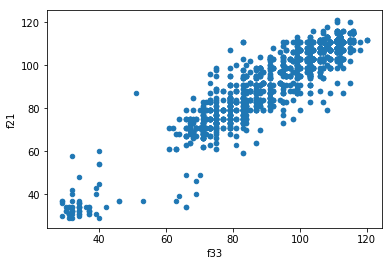

In [31]:
data.plot.scatter(x='f33', y='f21')